<a href="https://colab.research.google.com/github/micheleclarice/-Criar-um-ecossistema-de-Big-Data-usando-o-Google-Cloud-Platform-GCP-./blob/main/LAB3AZURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Pocco Pamonhas
Feito: Ver A fazer: Fazer um envio A fazer: Receber uma nota
A Pocco In, multinacional do ramo das pamonhas, inicará um projeto para migrar várias cargas de trabalho que, atualmente, estão no Apache Nifi para o Azure Databricks. Além de migrar os fluxos de trabalho a POCCO quer aproveitar a oportunidade para estruturar seu Data Warehouse, conforme especificado abaixo. Você deverá desenvolver um algoritmo em Python ou PySpark no Azure Databricks consumindo um arquivo disponibilizado no Azure Blob Storage, ingerir esses dados no SQL Server e construir um dashboard seguindo as especificações nesse exercício.



Arquitetura proposta
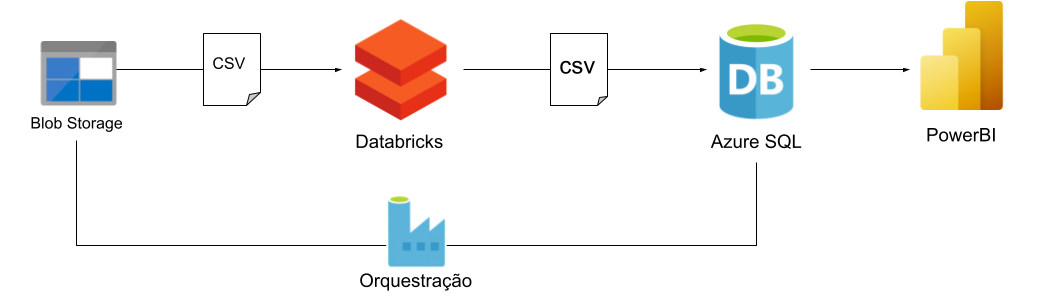




Dicionário de dados

Figura 1 - Stage

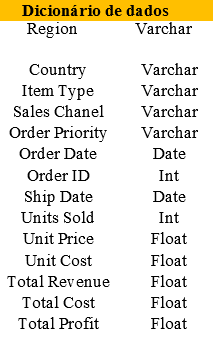
                               
Figura 2 - Tabela Fato

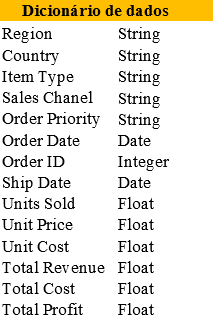



In [ ]:
  #Criando SCHEMAS STAGE e DW
CREATE SCHEMA STAGE_Michele_Santana3
GO
CREATE SCHEMA DW_Michele_Santana3
GO

#Criar Tabela Stage

CREATE TABLE [STAGE_michele_Santana3].[STAGE_Michele_Santana_lab3](

Region Varchar(50) null,
Country Varchar(50) null,
ItemType Varchar(50) null,
SalesChannel Varchar(50) null,
OrderPriority Varchar(50) null,
OrderDate DATE null,
OrderID Int null,
ShipDate DATE NULL,
UnitsSold int null,
UnitPrice float null,
UnitCost float null,
TotalRevenue float null,
TotalCost float null,
TotalProfit float null,
)

#Criando Tabela Fato(Receber os dados)
CREATE TABLE [DW_Michele_Santana3].[FATO_Sales]
(
Region Varchar(50) null,
Country	Varchar(50) null,
ItemType Varchar(50) null,
SalesChannel Varchar(50) null,
OrderPriority Varchar(50) null,
OrderDate date null,
OrderID Int null,
ShipDate Date null,
UnitsSold int null,
UnitPrice FLOAT null,
UnitCost FLOAT null,
TotalRevenue float null,
TotalCost FLOAT null,
TotalProfit FLOAT null,
)

#TABELAS DE DIMENSÕES

CREATE TABLE [DW_Michele_Santana3].DIM_Region(
Region_id int not null,
Region Varchar(60)
)

CREATE TABLE [DW_Michele_Santana3].DIM_Sales Channel(
SalesChannel_id INT not null,
SalesChannel Varchar(60)
)

CREATE TABLE [DW_Michele_Santana3].DIM_Country(
Country_id INT not null,
Country Varchar(60)
)

#CONSULTA

SELECT COUNT(*) FROM [STAGE_Michele_Santana3].[STAGE_Michele_Santana_lab3]

#Criar Procedure e Limpeza das tabelas finais para inserção dos novos dados

CREATE PROCEDURE [DW_Michele_Santana3].[procedure_michele_santanalab3]
AS
BEGIN

    TRUNCATE TABLE [DW_Michele_Santana3].[DIM_SalesChannel]
    INSERT INTO [DW_Michele_Santana3].[DIM_SalesChannel]([SalesChannel])
    SELECT DISTINCT [Sales Channel]
    FROM [STAGE_Michele_Santana3].[STAGE_Michele_Santana_lab3]

    TRUNCATE TABLE [DW_Michele_Santana3].[DIM_Country]
    INSERT INTO [DW_Michele_Santana3].[DIM_Country]([Country])
    SELECT DISTINCT [Country]
    FROM [STAGE_Michele_Santana3].[STAGE_Michele_Santana_lab3]

    TRUNCATE TABLE [DW_Michele_Santana3].[DIM_Region]
    INSERT INTO [DW_Michele_Santana3].[DIM_Region]([Region])
    SELECT DISTINCT [Region]
    FROM [STAGE_Michele_Santana3].[STAGE_Michele_Santana_lab3]

    TRUNCATE TABLE [DW_Michele_Santana3].[FATO_Sales]

    INSERT INTO [DW_Michele_Santana3].[FATO_Sales]
    (
    [OrderID],
    [Country_id],
    [Region_id],
    [SalesChannel_id],
    [ItemType],
    [OrderPriority],
    [OrderDate],
    [ShipDate],
    [UnitsSold],
    [UnitPrice],
    [UnitCost],
    [TotalRevenue],
    [TotalCost],
    [TotalProfit]
    )

    SELECT
    A.[Order ID],
    B.[Country_id],
    C.[Region_id],
    D.[SalesChannel_id],
    A.[Item Type],
    A.[Order Priority],
    A.[Order Date],
    A.[Ship Date],
    A.[Units Sold],
    A.[Unit Price],
    A.[Unit Cost],
    A.[Total Revenue],
    A.[Total Cost],
    A.[Total Profit]
    FROM [STAGE_Michele_Santana3].[STAGE_Michele_Santana_lab3] A

    INNER JOIN (SELECT * FROM [DW_Michele_Santana3].[DIM_Country]) B
    ON A.[Country] = B.[Country]

    INNER JOIN (SELECT * FROM [DW_Michele_Santana3].[DIM_Region]) C
    ON A.[Region] = C.[Region]

    INNER JOIN (SELECT * FROM [DW_Michele_Santana3].[DIM_SalesChannel]) D
    ON A.[Sales Channel] = D.[SalesChannel]

END


<h1 align="center">Michele Santana</h1>


#<h2 align="center">**Projeto PoccoPamonhas III**</h2>


<h3 align="left">Connect with me:</h3>
<p align="left">
<a href="https://fb.com/https://www.facebook.com/michele.machadodesantana/" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/facebook.svg" alt="https://www.facebook.com/michele.machadodesantana/" height="30" width="40" /></a>
<a href="https://discord.gg/micheleclarice#7754" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/discord.svg" alt="micheleclarice#7754" height="30" width="40" /></a>
</p>



#DASHBOARD LAB 3
Especificação para construçãos dos dashboard em Power BI
VENDAS = quantidade de itens multiplicados pelo valor do item.

O acumulado de vendas do último ano por Região e País.
Ele gostaria de ter essa visão através de um Mapa Mundial diretamente no Relatório.
Quantidade de vendas dos últimos 10 dias através de um gráfico de colunas.
Quantidade de vendas e a Quantidade acumulada de vendas dos últimos 30 dias.
Uma visão acumulada das vendas do último ano por Canal e País. De forma que seja possível ver a distribuição das vendas um determinado país por canal.
Especificação para reestruturação do Data Warehouse
Os relatórios desenvolvidos no Power BI deverão apontar para as seguintes tabelas:

Dimensão com as regiões.
Dimensão com país.
Dimensão com Canais de venda.
Fato com as vendas
Imagens Dashboard com os Dados solicitados